##Import the dataset


In [ ]:
!pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c 'house-prices-advanced-regression-techniques'

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 93.4MB/s]


In [6]:
! mkdir train

In [7]:
! unzip house-prices-advanced-regression-techniques.zip -d train

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: train/data_description.txt  
  inflating: train/sample_submission.csv  
  inflating: train/test.csv          
  inflating: train/train.csv         


##Code

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.impute import KNNImputer

%matplotlib inline
sns.set(color_codes=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('/content/train/train.csv') #load the data
df.head(10)#view the first 10 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [10]:
df.shape

(1460, 81)

In [11]:
df.count()#

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [12]:
#Coutn the null values of each column
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [13]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

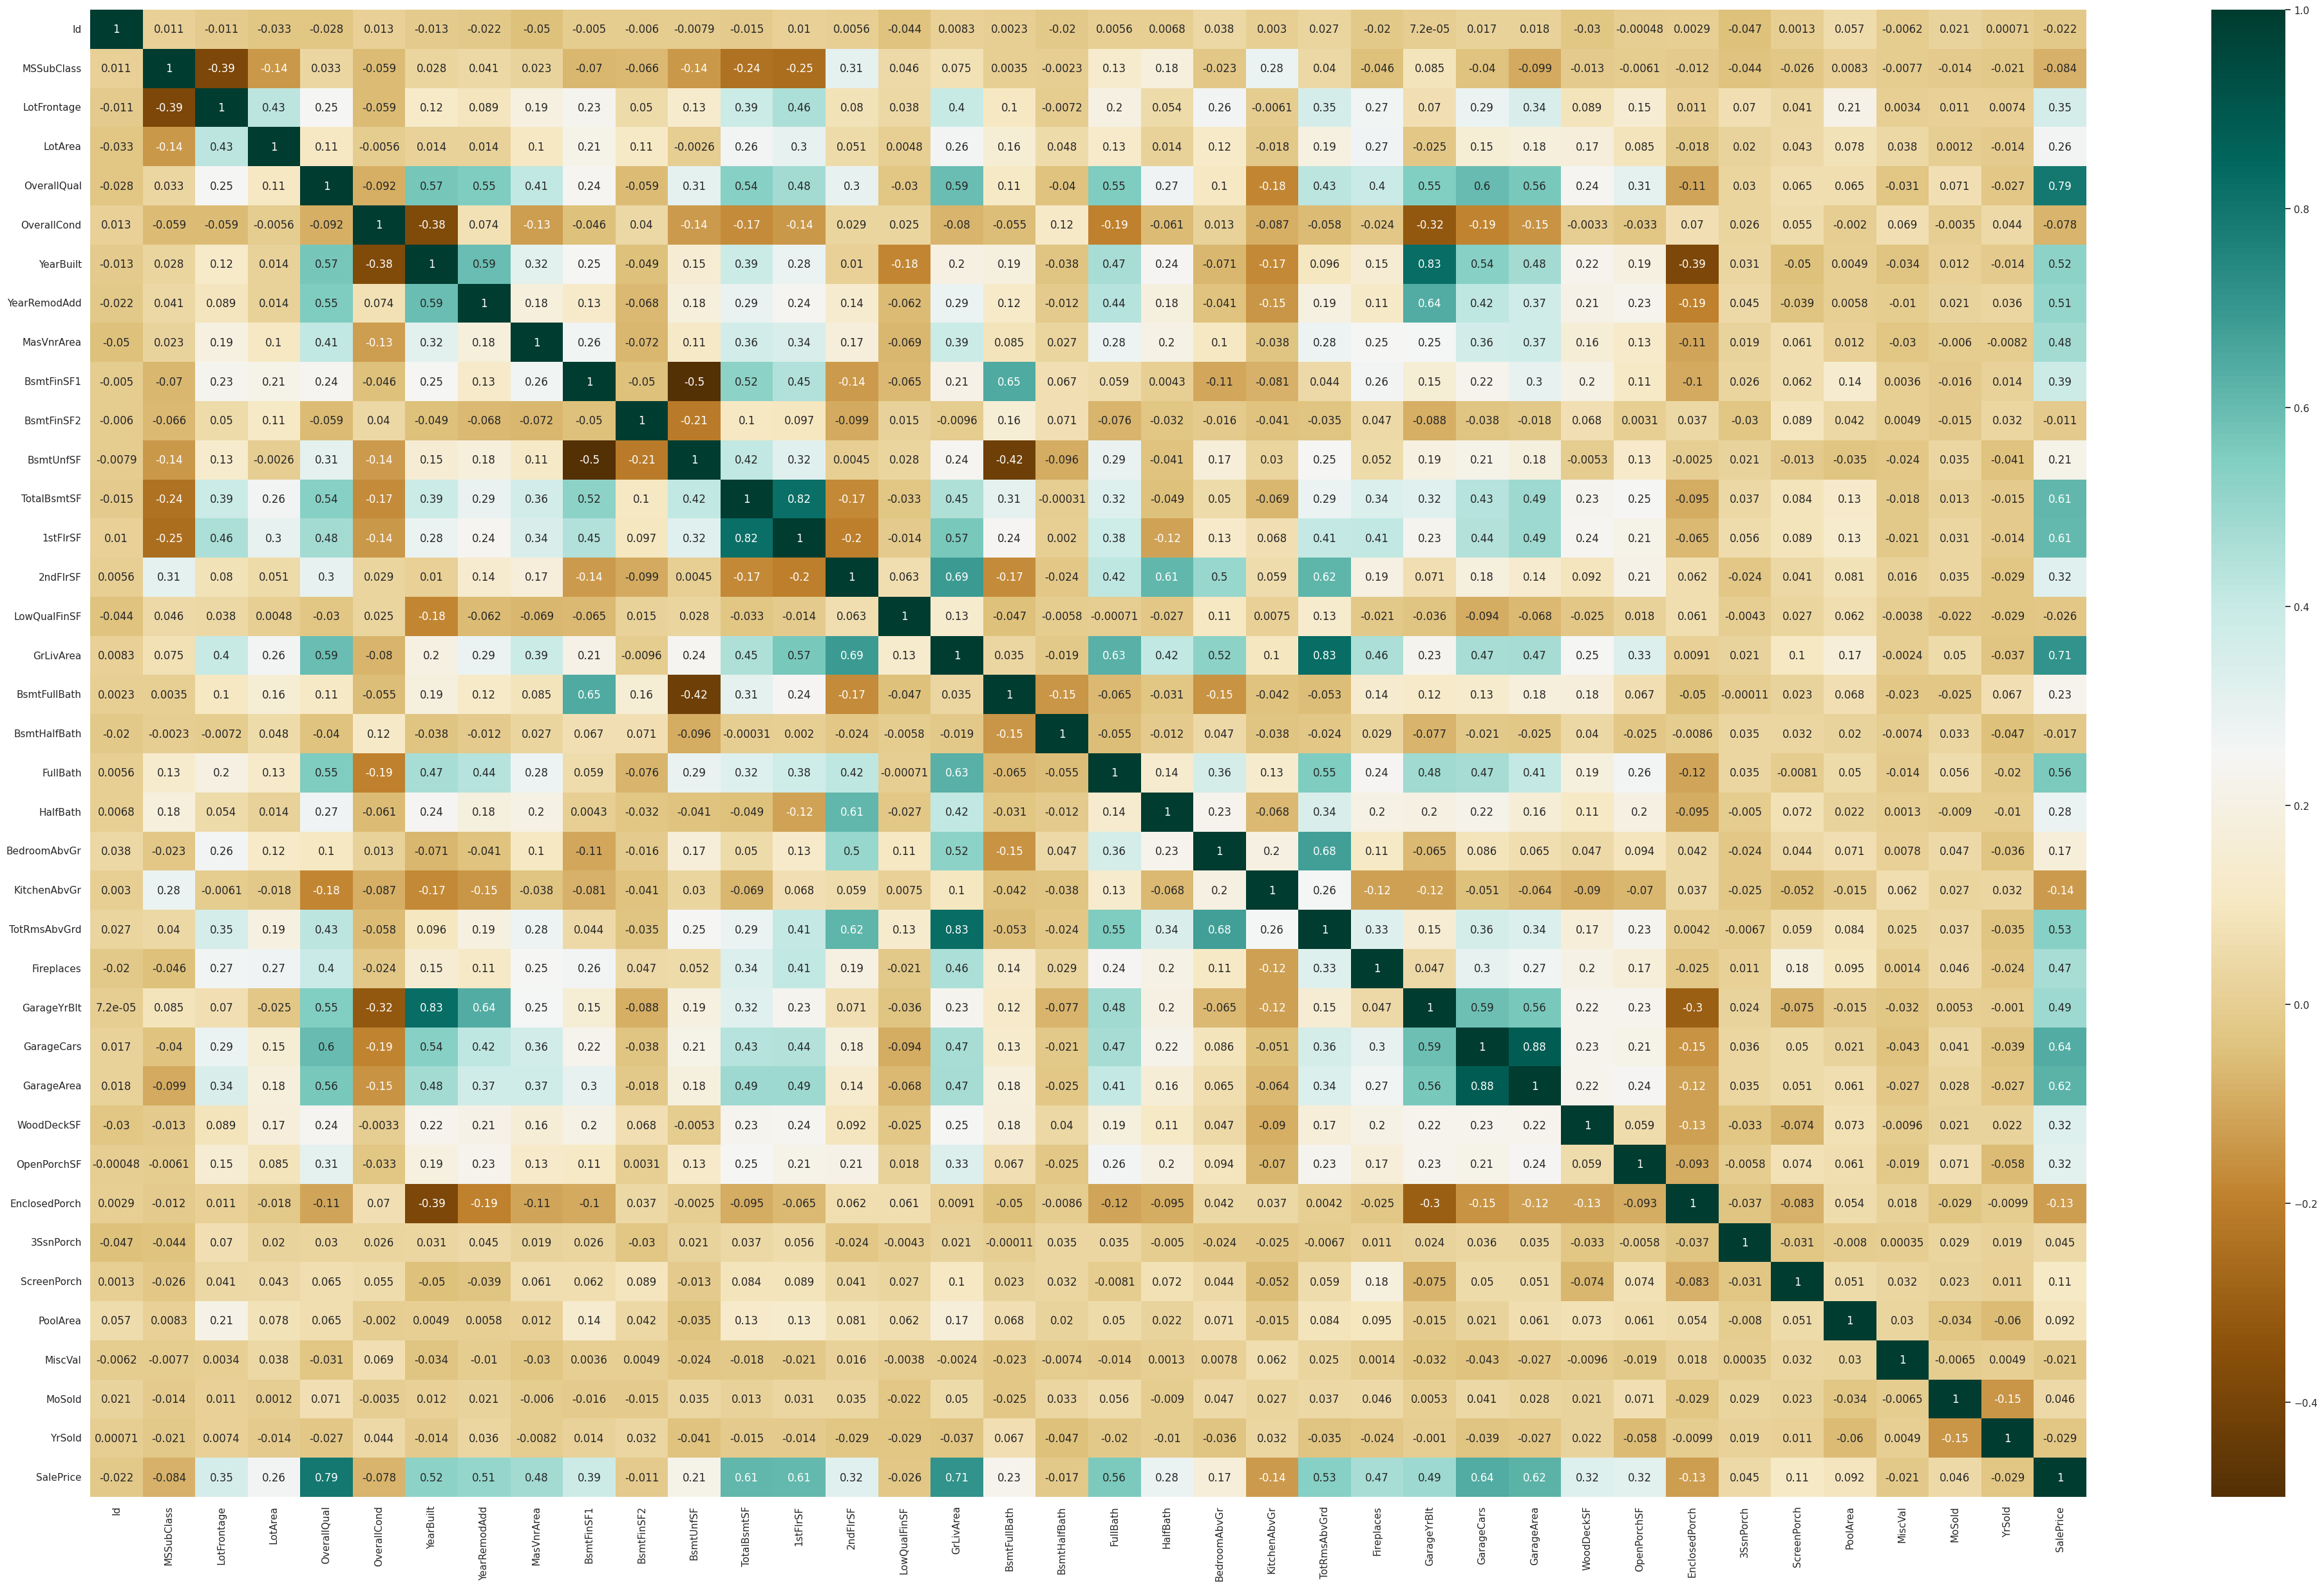

In [14]:
#generating the heat map
plt.figure(figsize=(50,30))
c= df.corr() #correlation
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [15]:
#make a copy of the original dataframe
df_copy= df.copy()
df_copy.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [16]:
feats=[
'LotArea',
'MSZoning',
'Utilities',
'Neighborhood',
'HouseStyle',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'Heating',
'KitchenQual',
'GarageType',
'GarageCars',
'GarageQual',
'GarageArea']


Univariate analysis

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


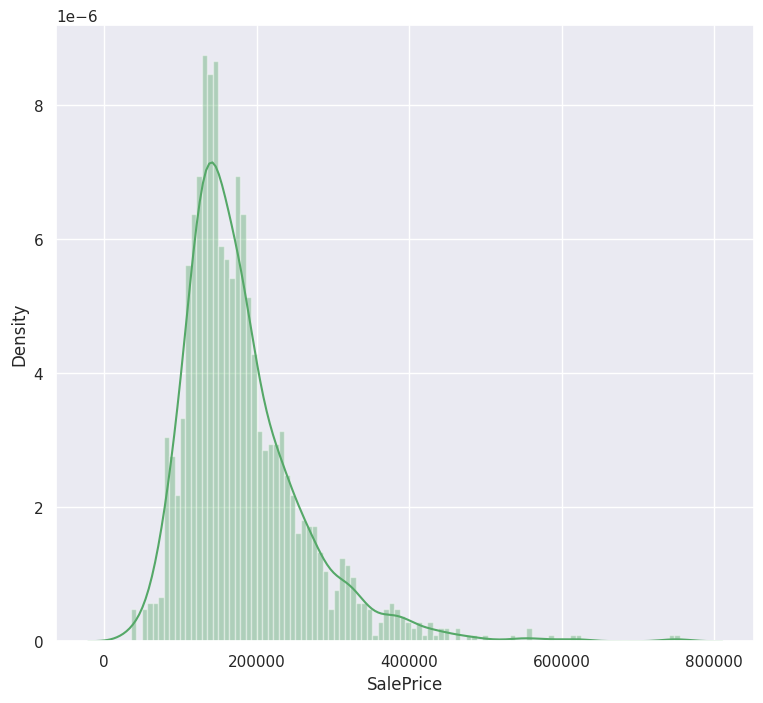

In [17]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [18]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

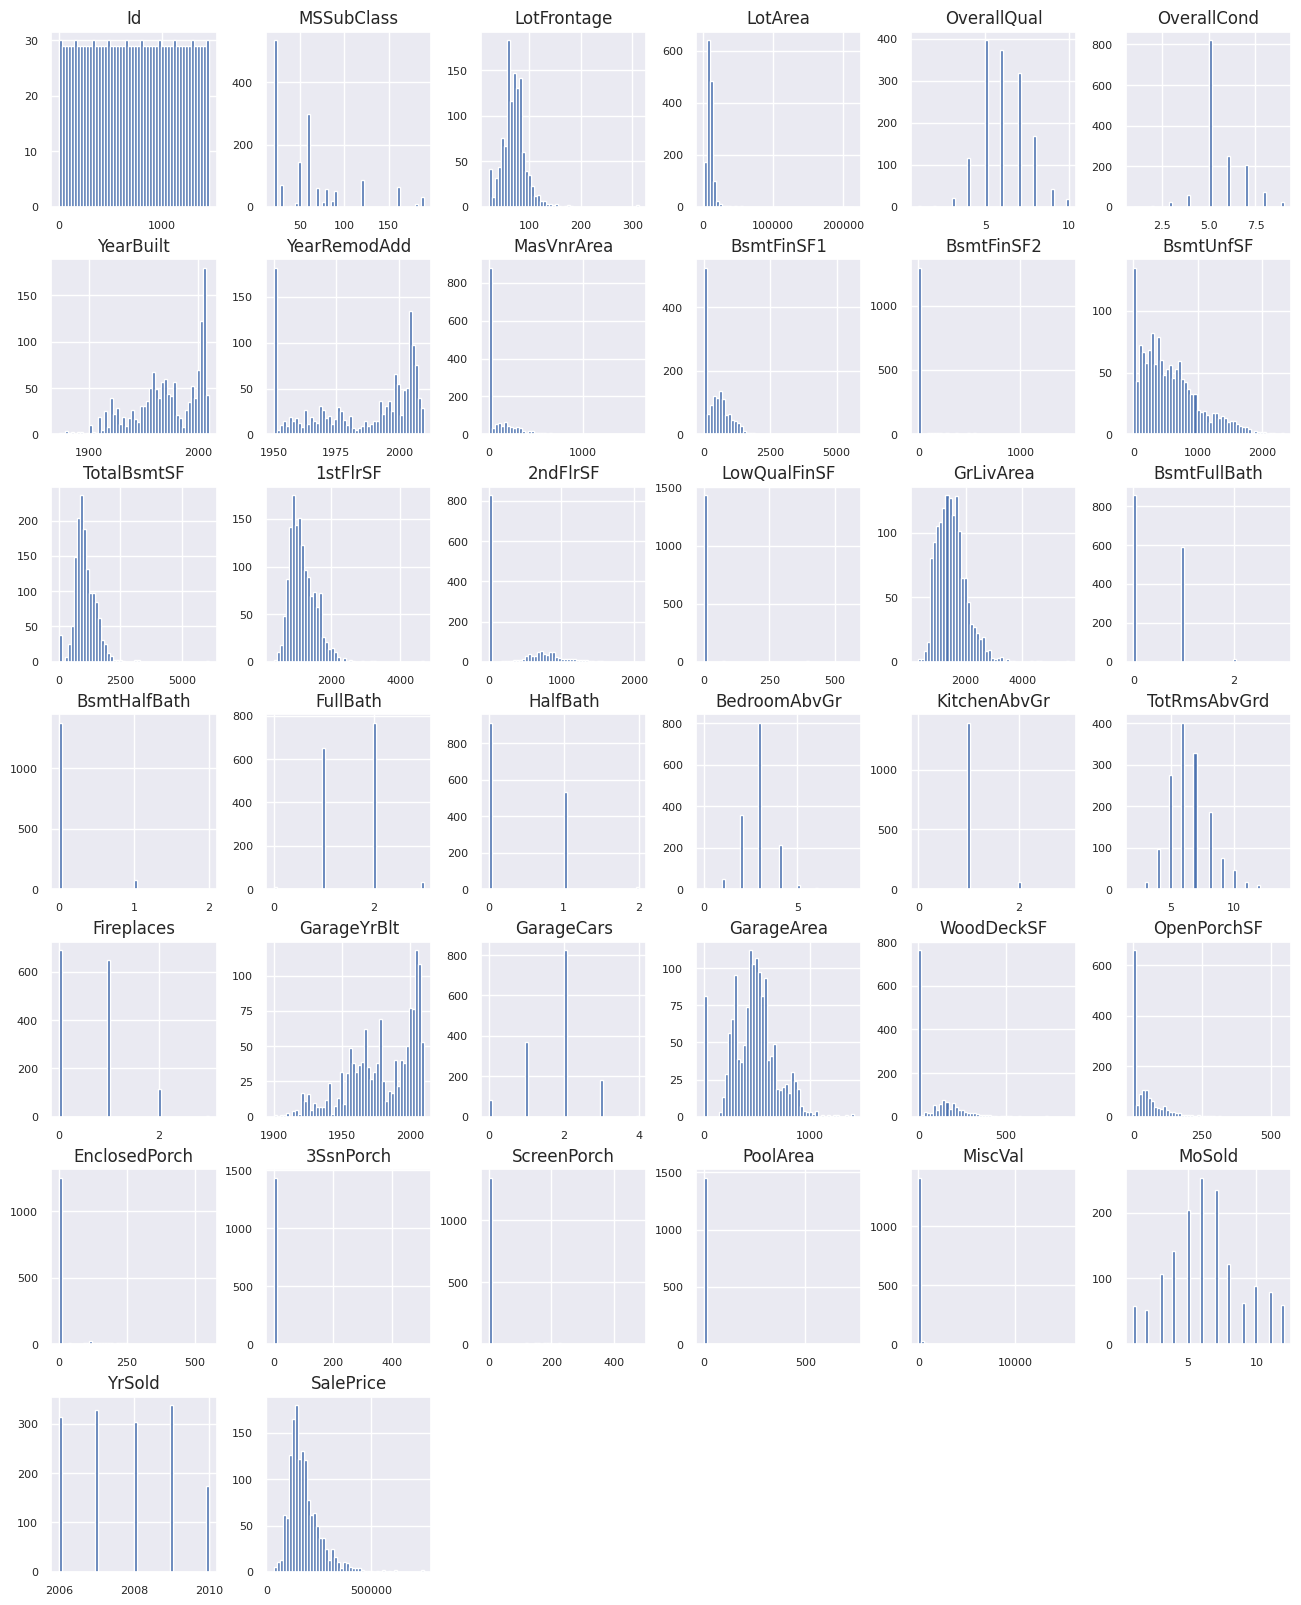

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Multivariate analysis

Text(0.5, 1.0, 'Correlation of the target variable with other features')

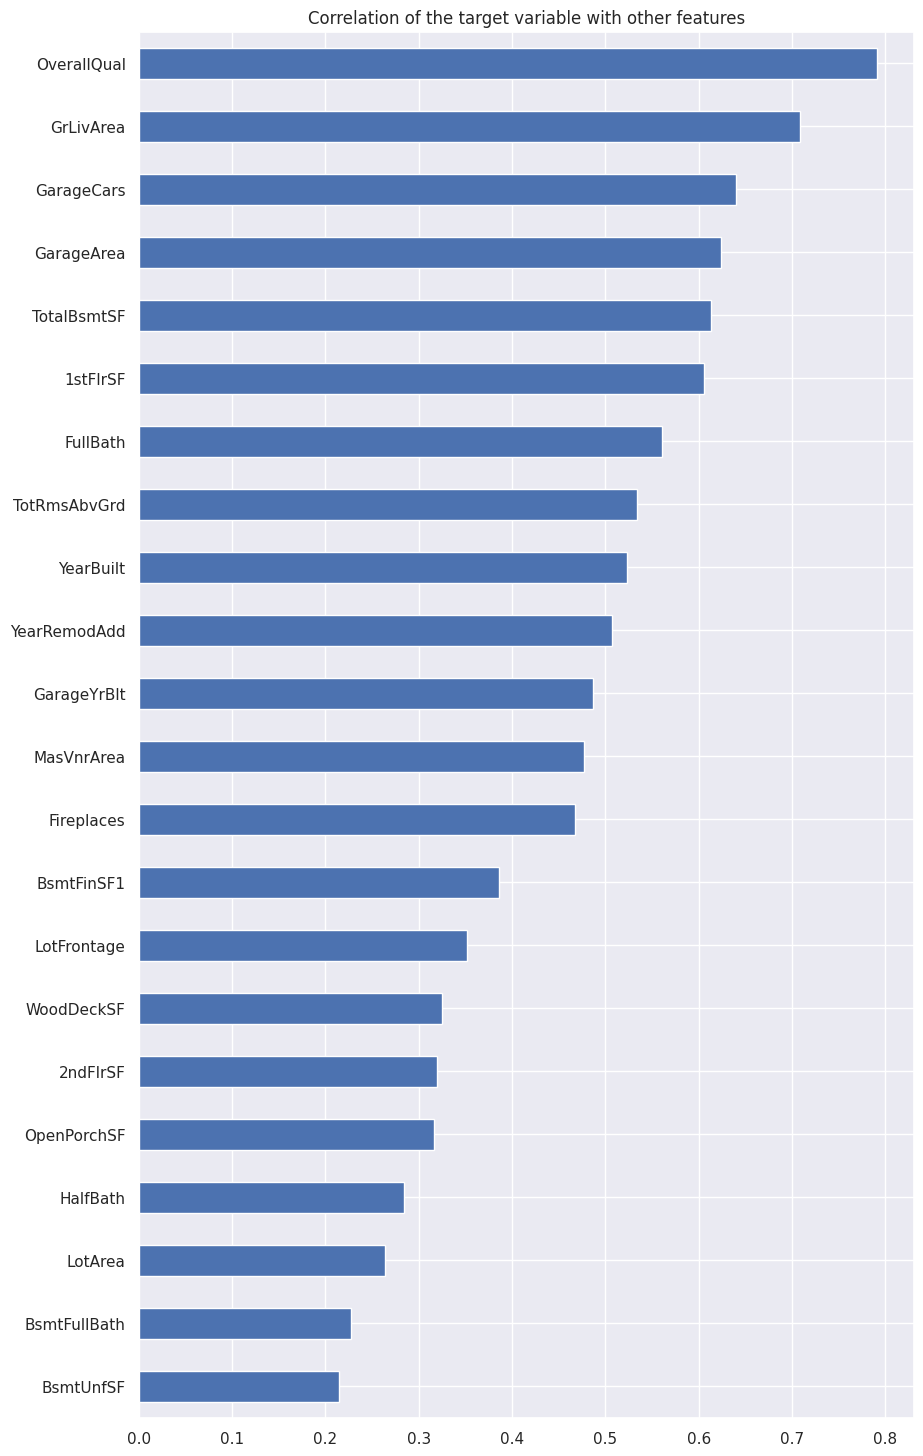

In [20]:

corr= df.corr(numeric_only= True)

# get correlation with the target variable only
target_corr= corr["SalePrice"].sort_values(ascending= True)
# show high correlations only
high_target_corr= target_corr[target_corr.abs() > 0.2]
high_target_corr_cols= high_target_corr.index.to_list()

# plot correlations
plt.figure(figsize= (10, 18))
high_target_corr.drop('SalePrice').plot(kind= 'barh')
plt.title('Correlation of the target variable with other features')

<function matplotlib.pyplot.show(close=None, block=None)>

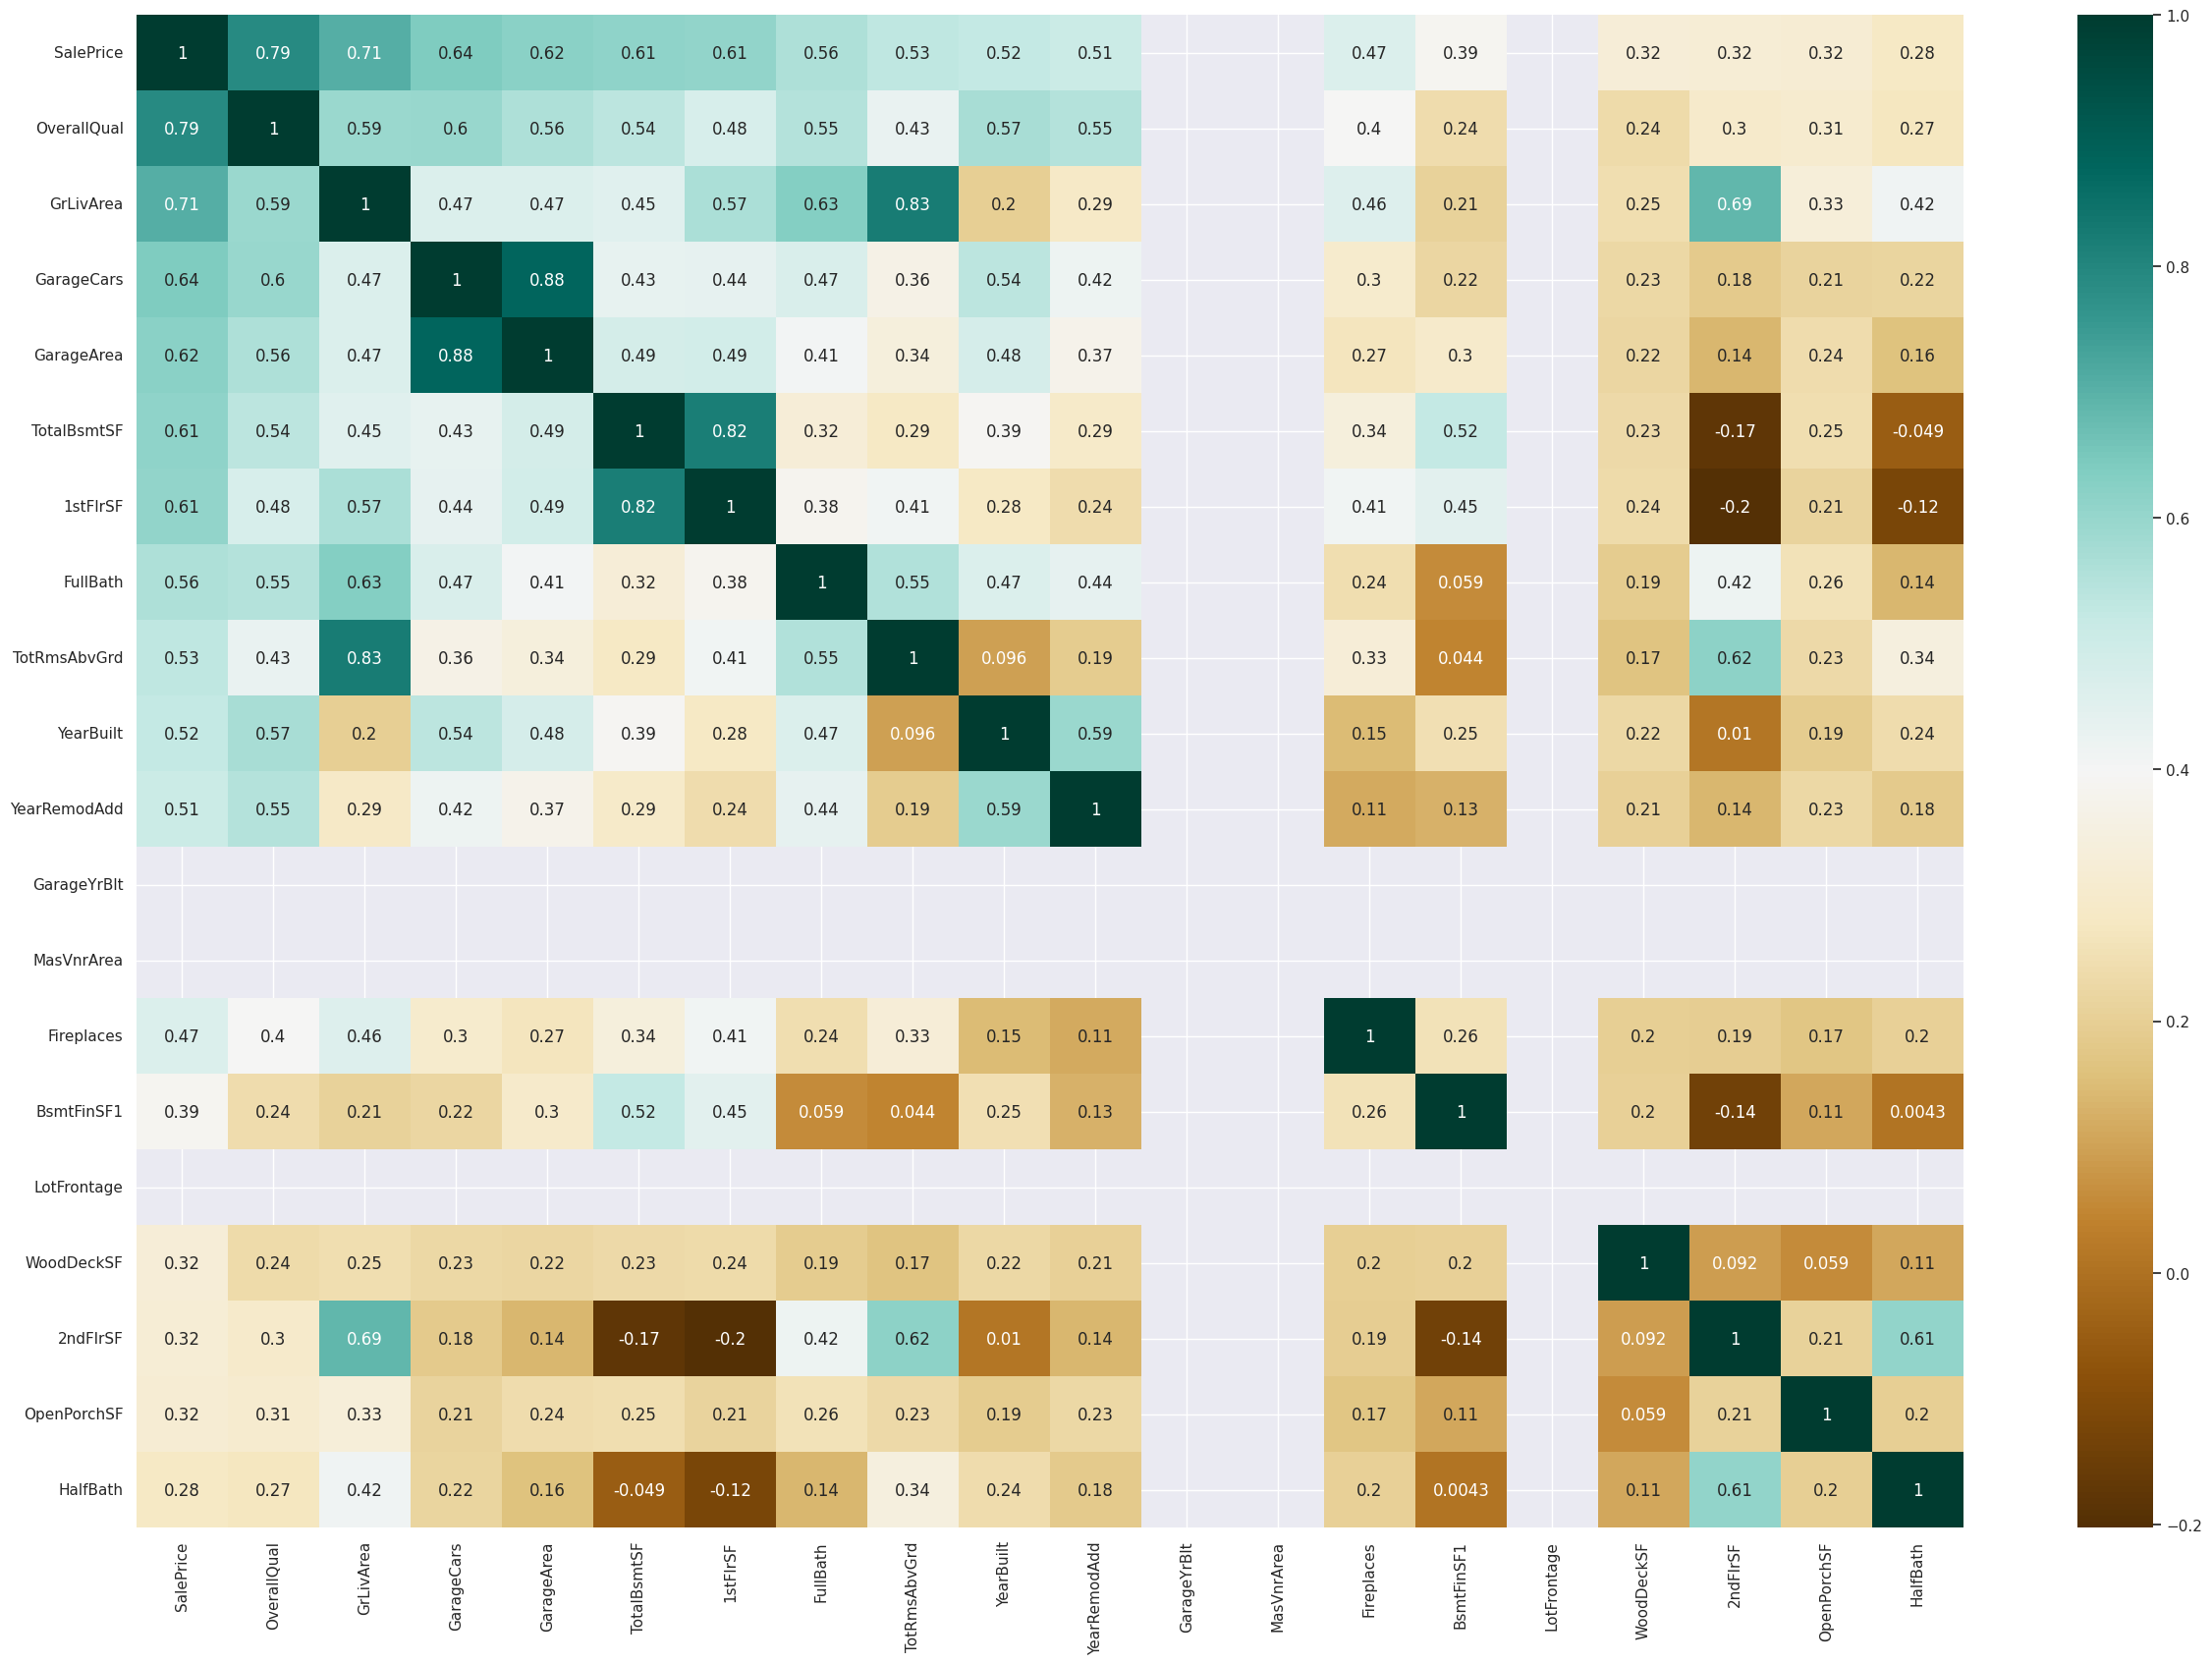

In [21]:
k=20
cols= c.nlargest(k,'SalePrice')['SalePrice'].index
corr= np.corrcoef(df[cols].values.T)
plt.figure(figsize=(30,20))

sns.heatmap(corr,cmap="BrBG",annot=True,yticklabels=cols.values,xticklabels=cols.values)
plt.show

In [22]:
# for feat in feats :
#   cols.values.append[feat if feat not in cols.values ]


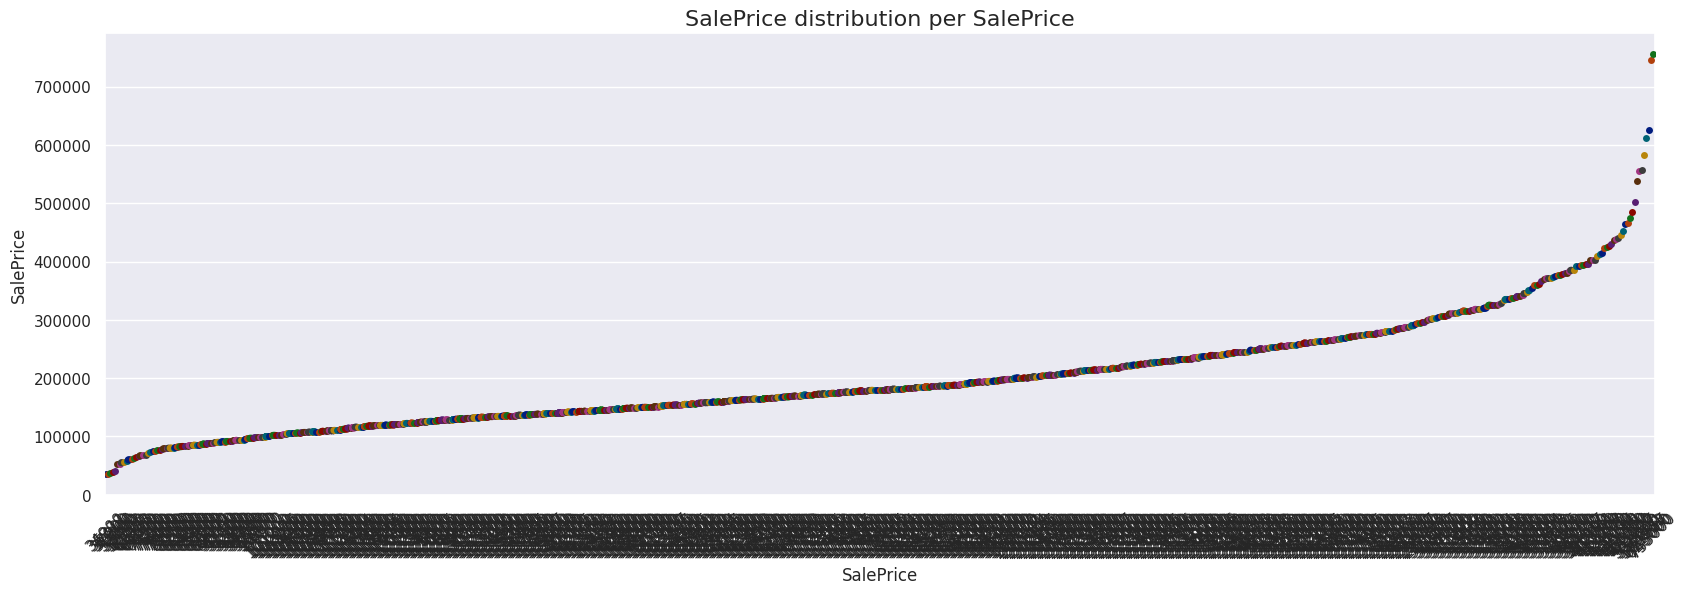

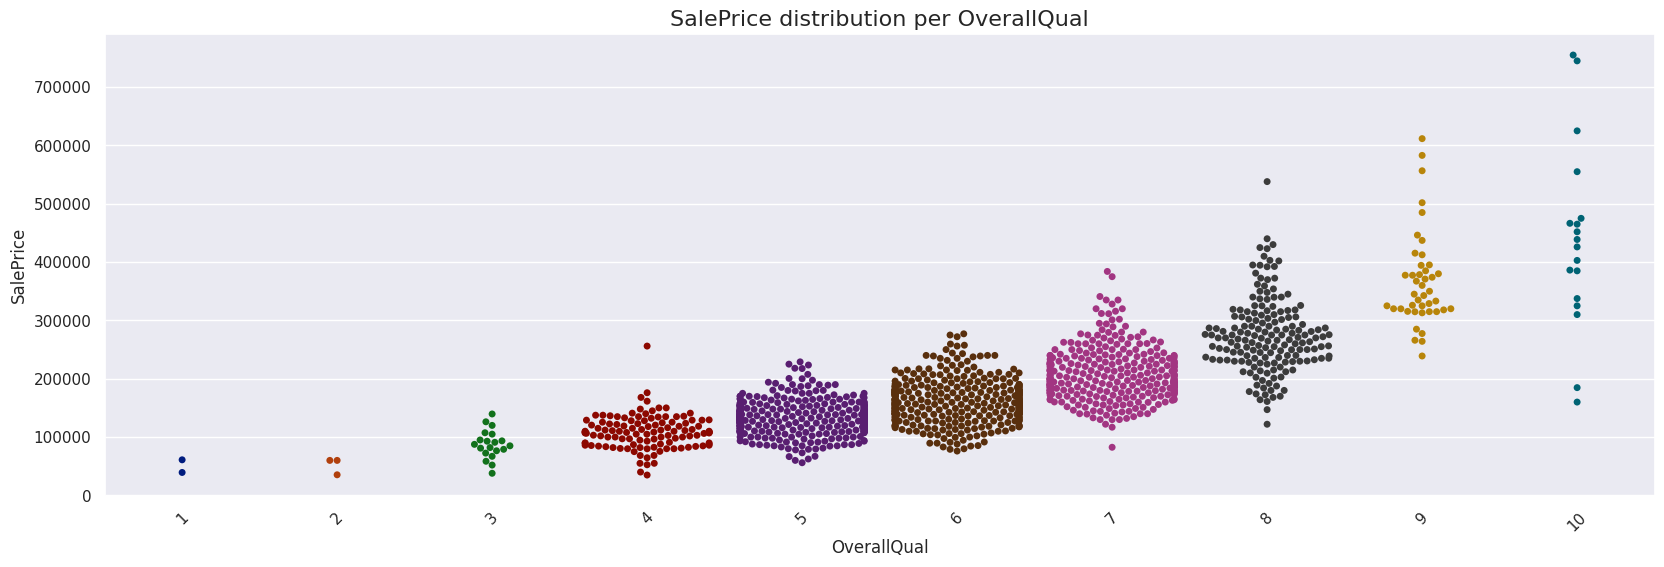

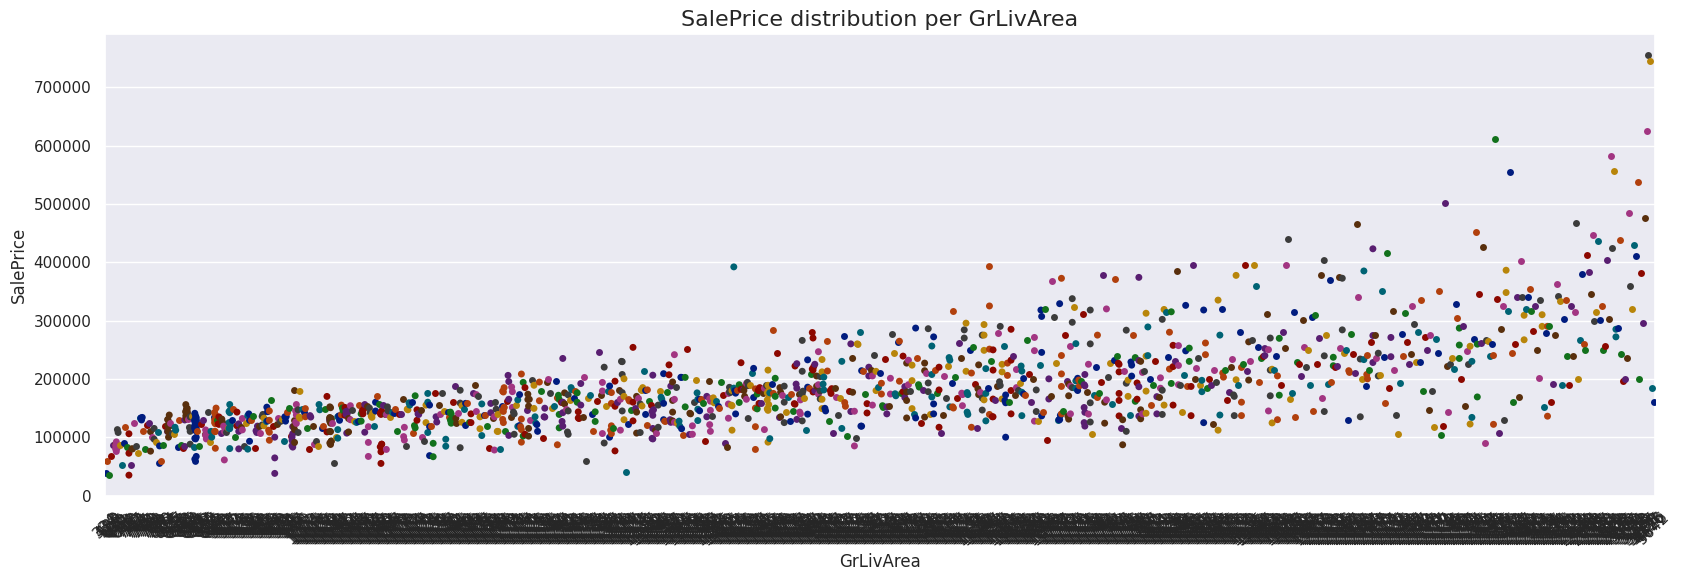

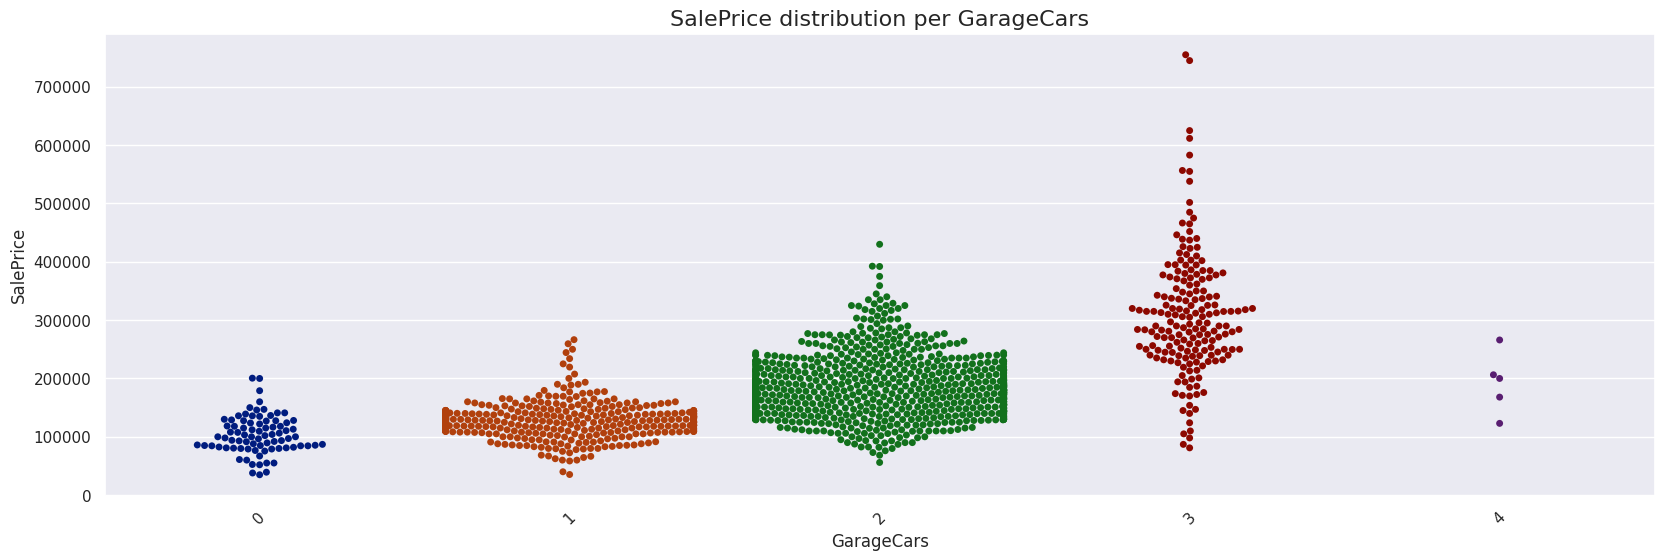

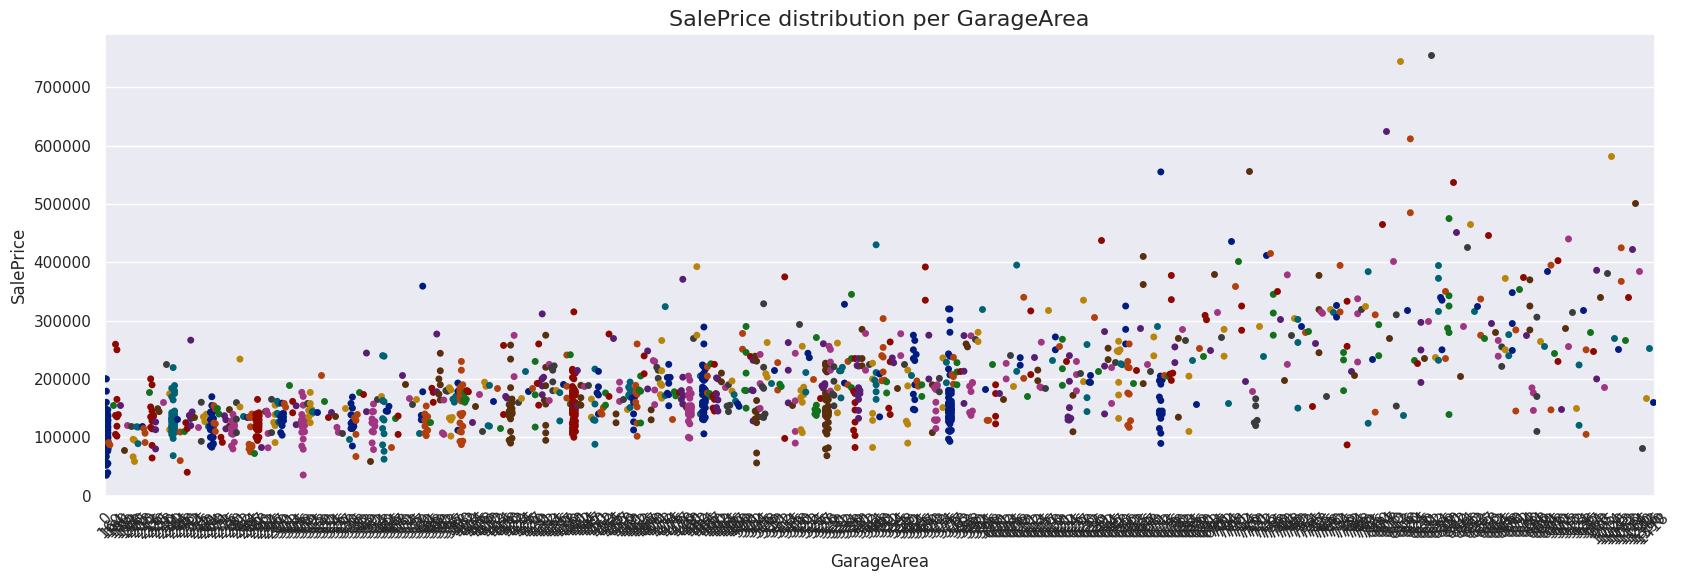

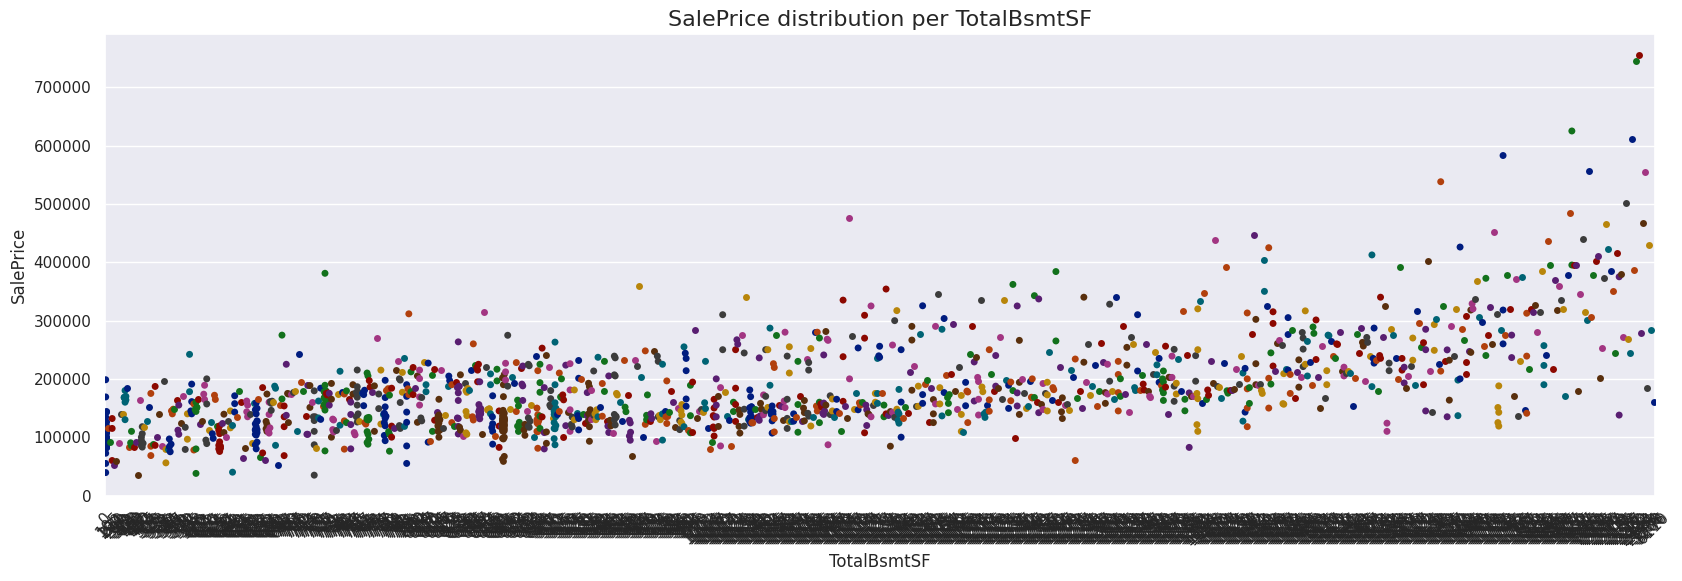

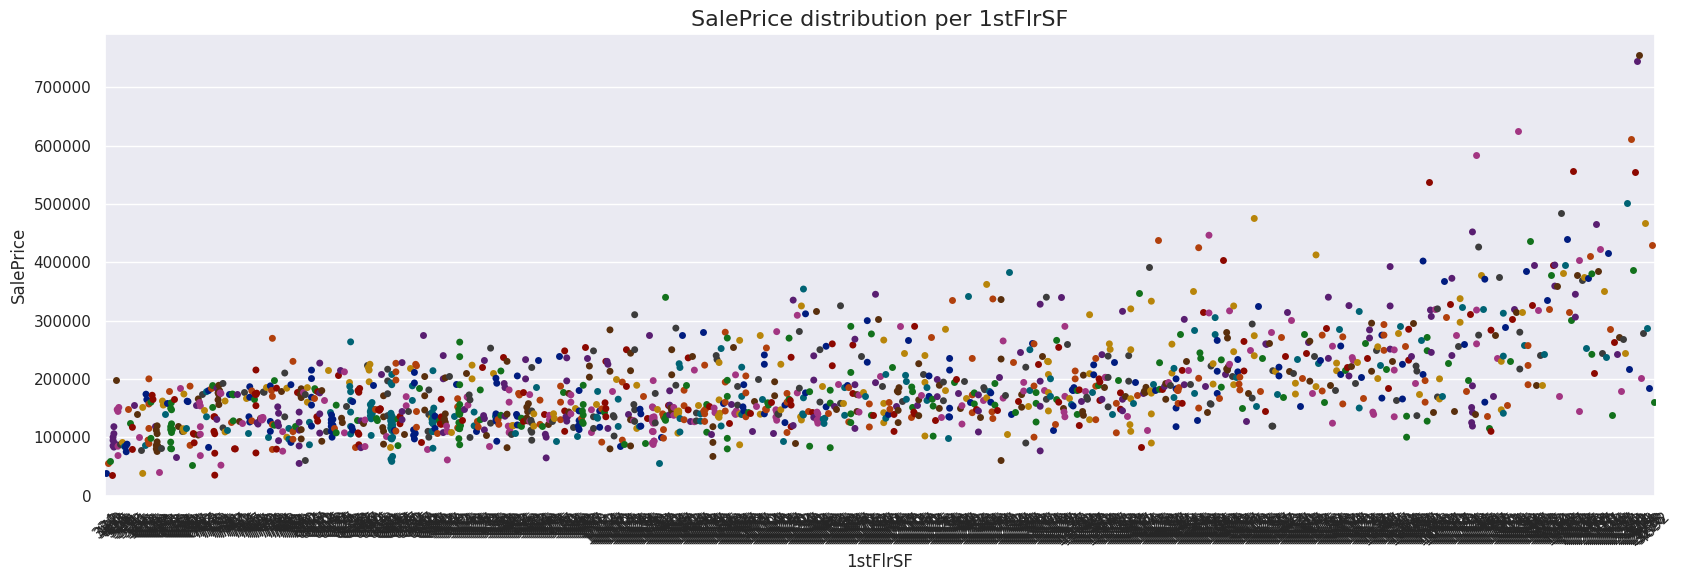

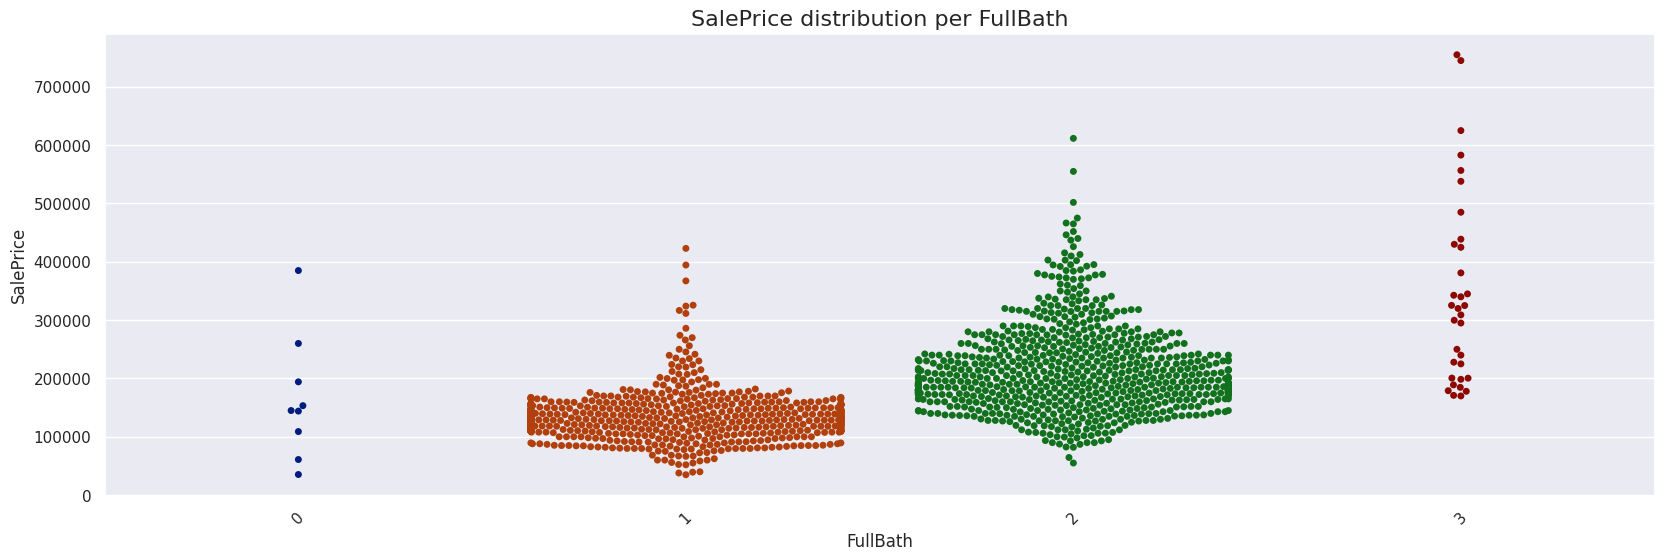

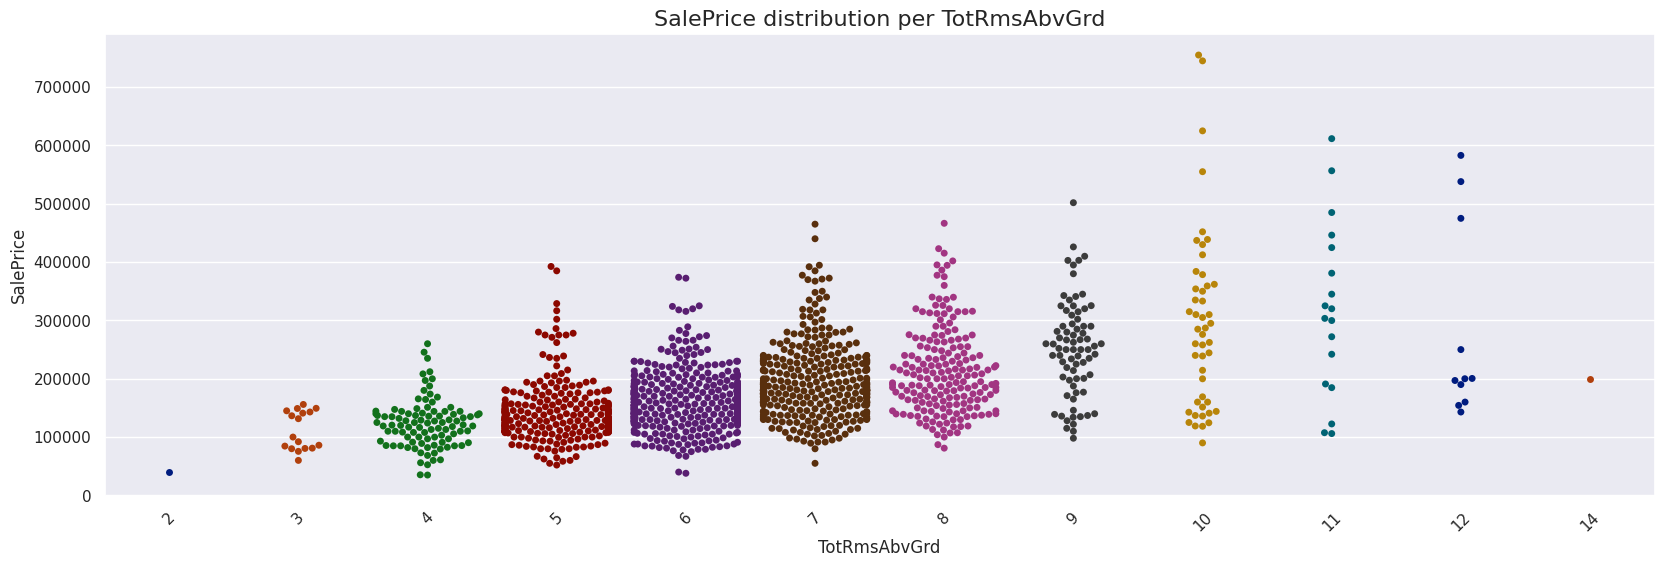

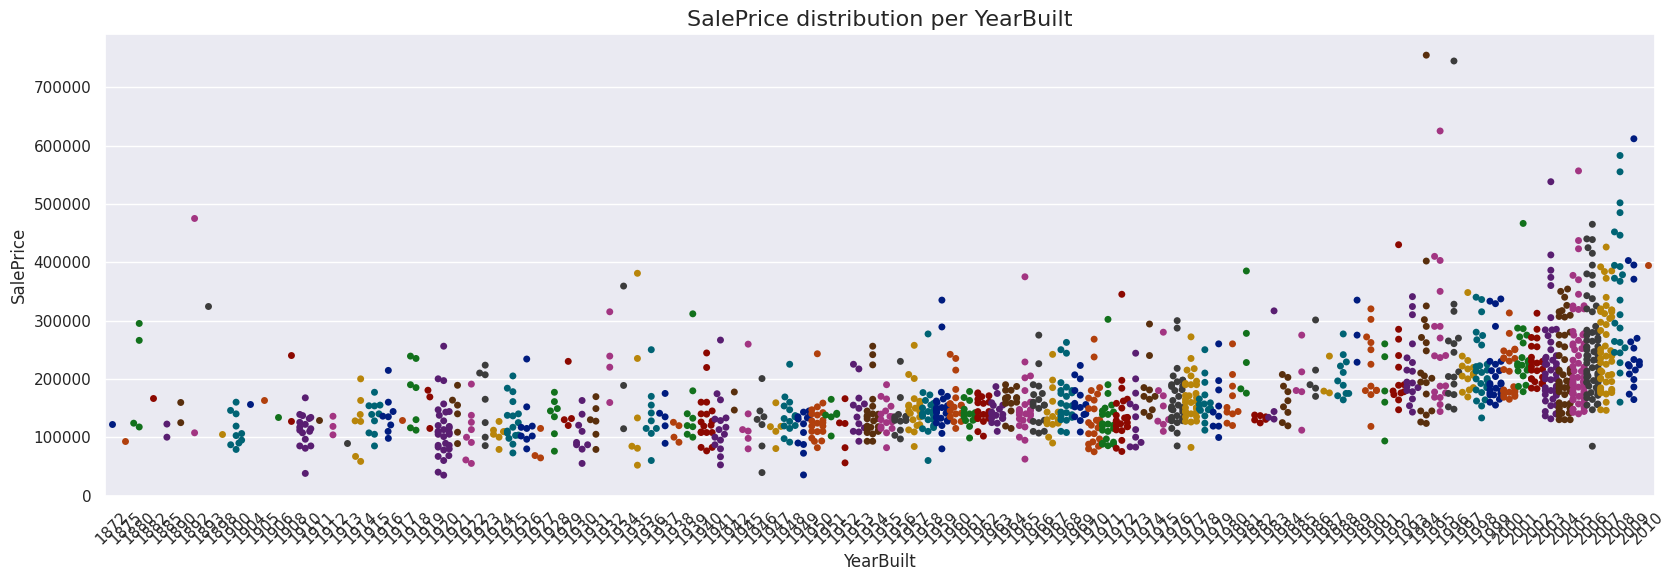

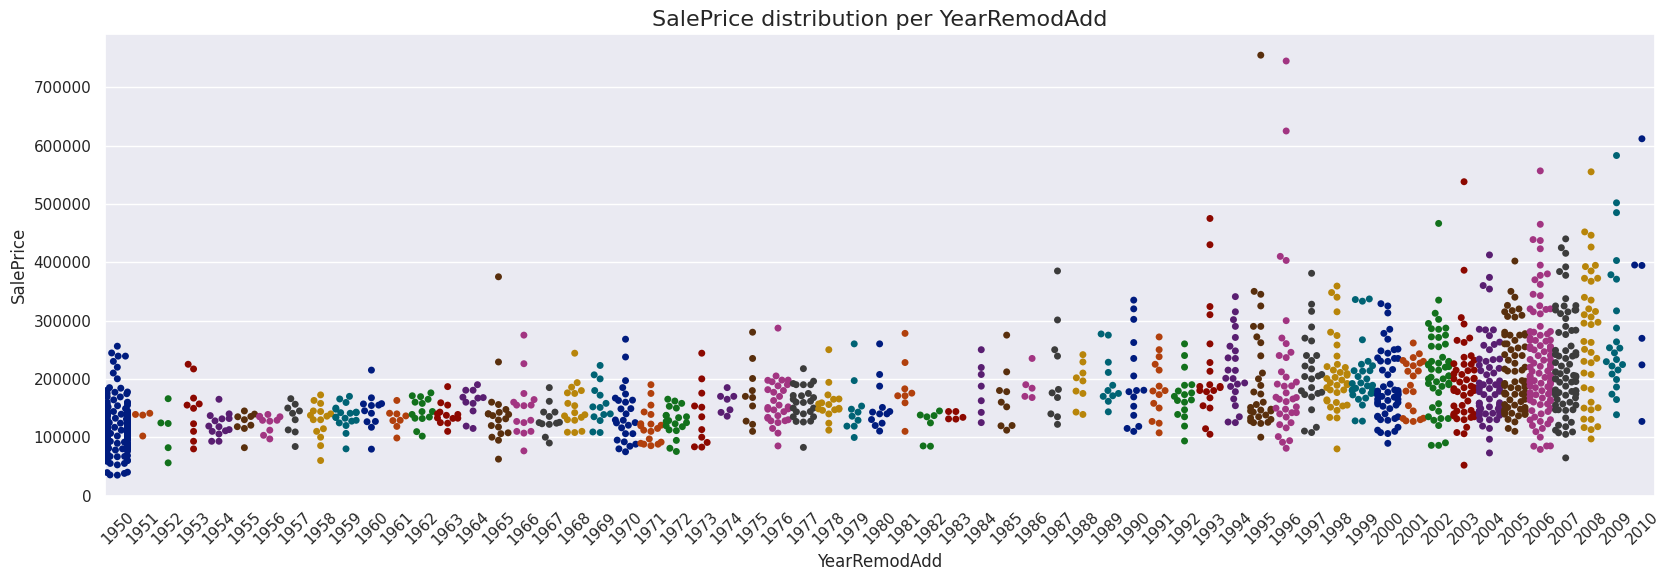

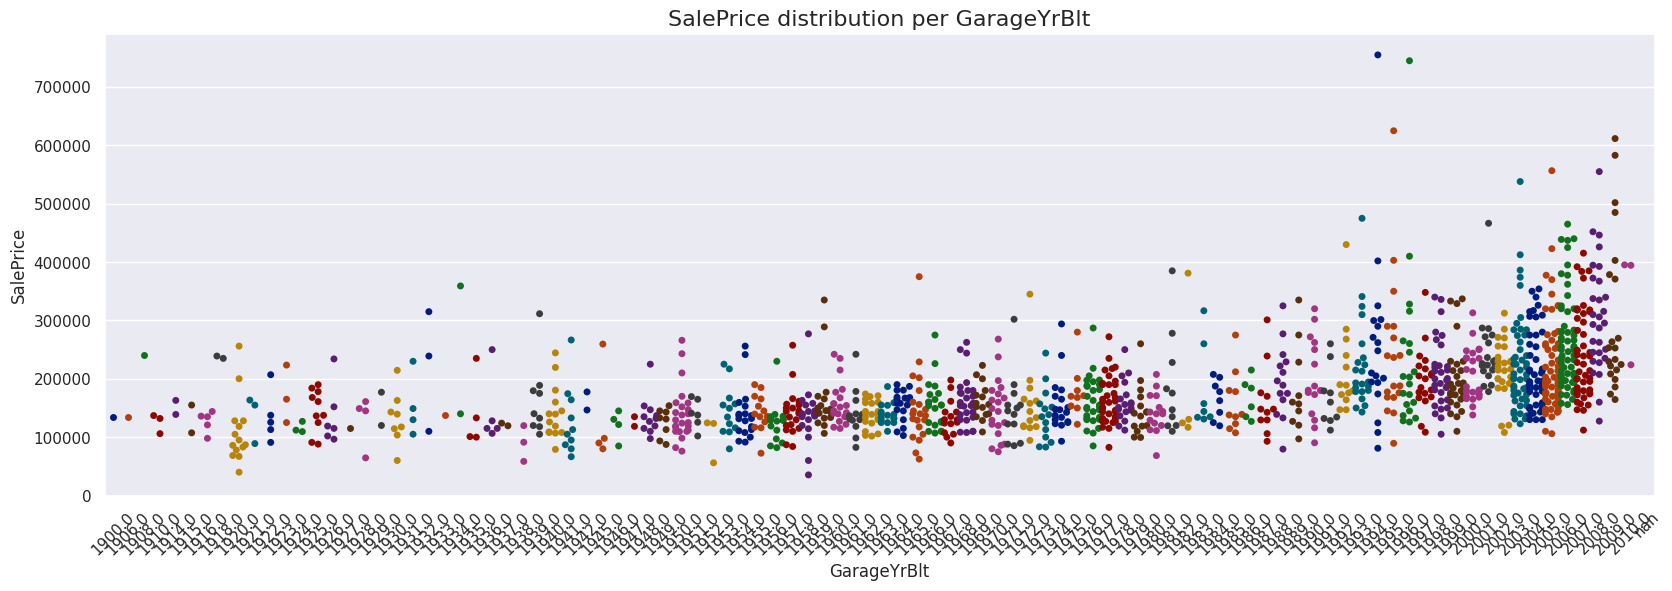

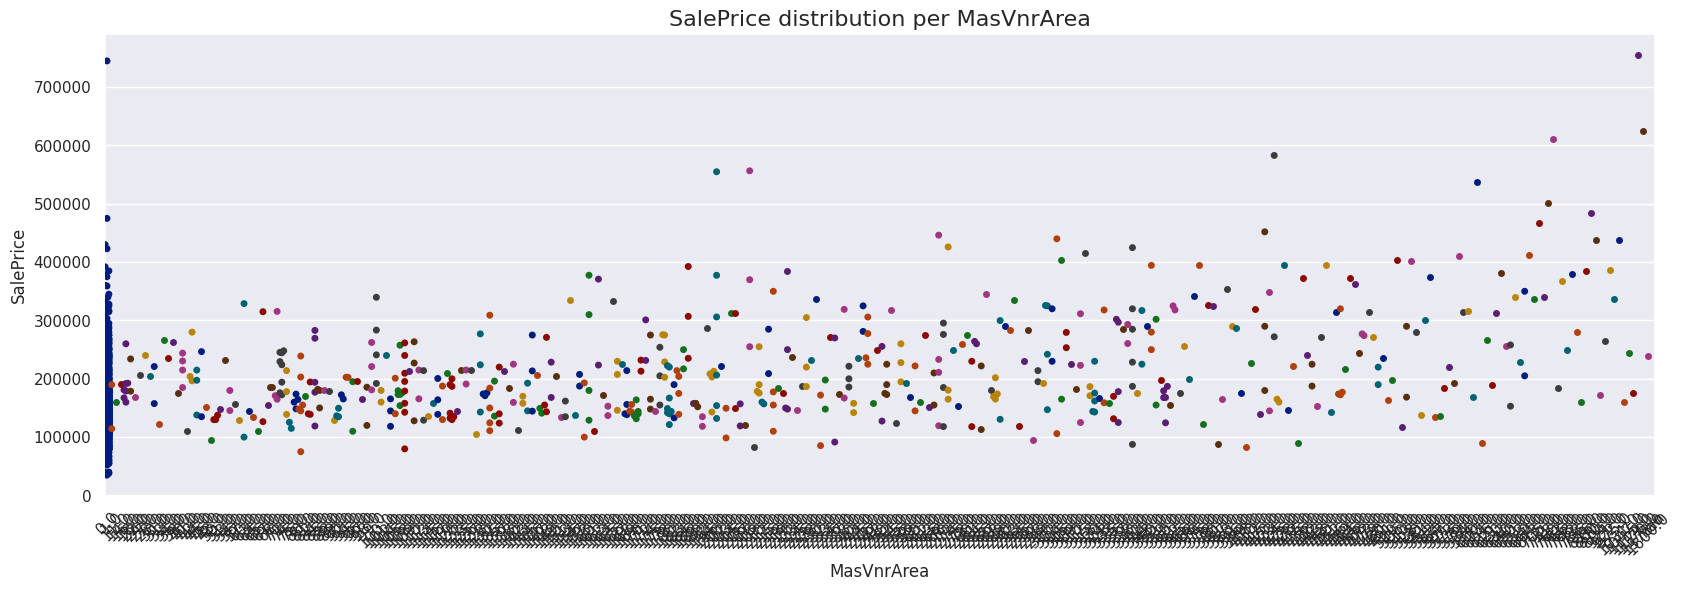

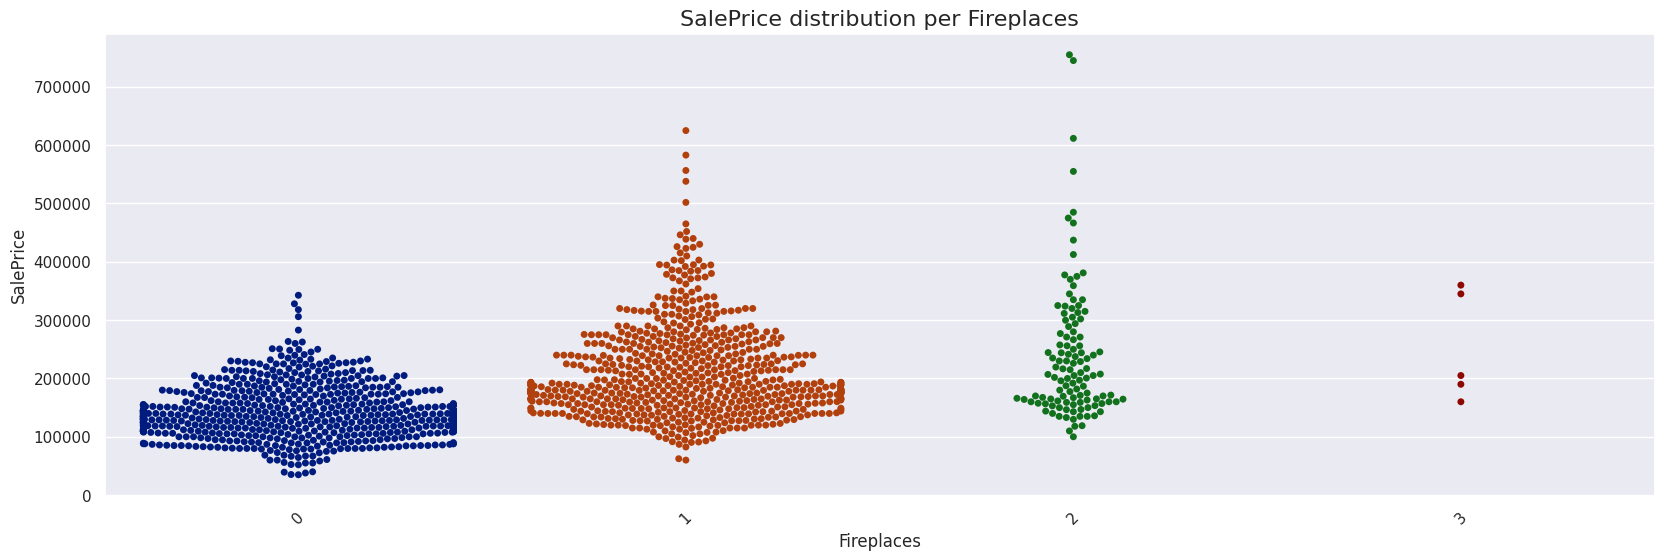

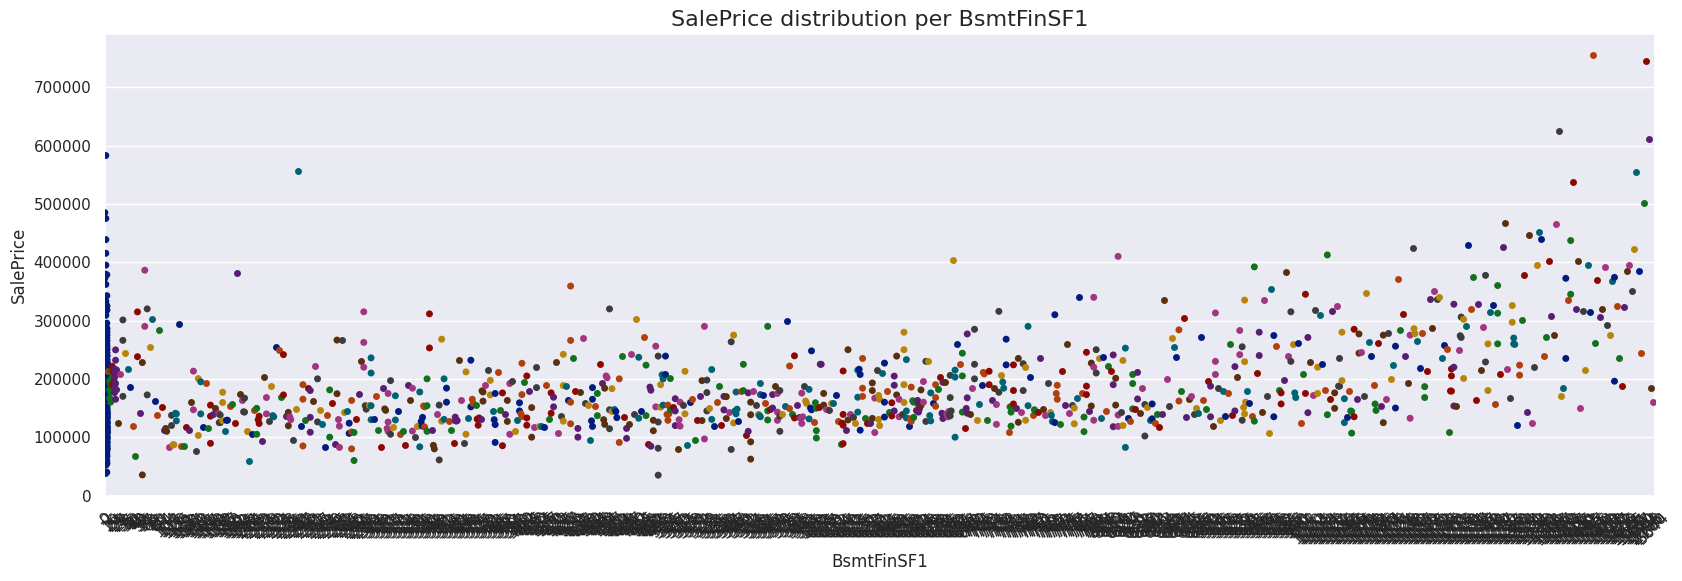

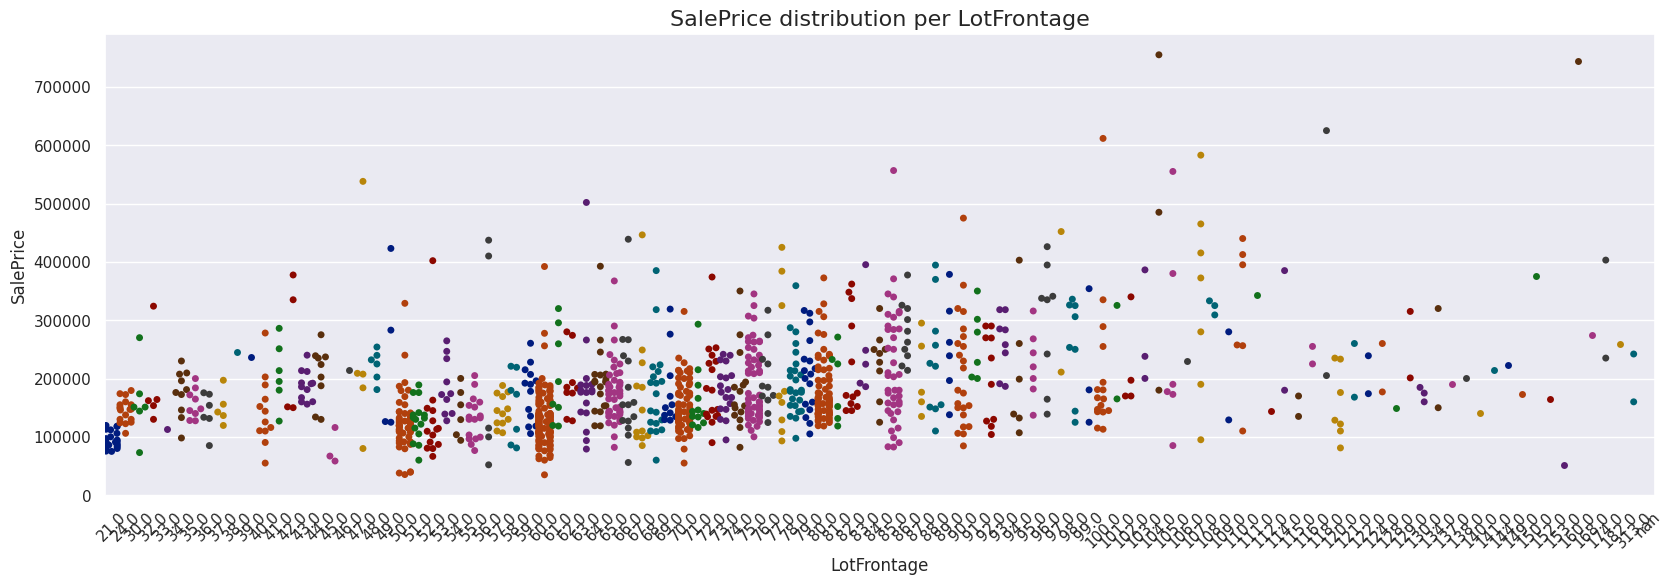

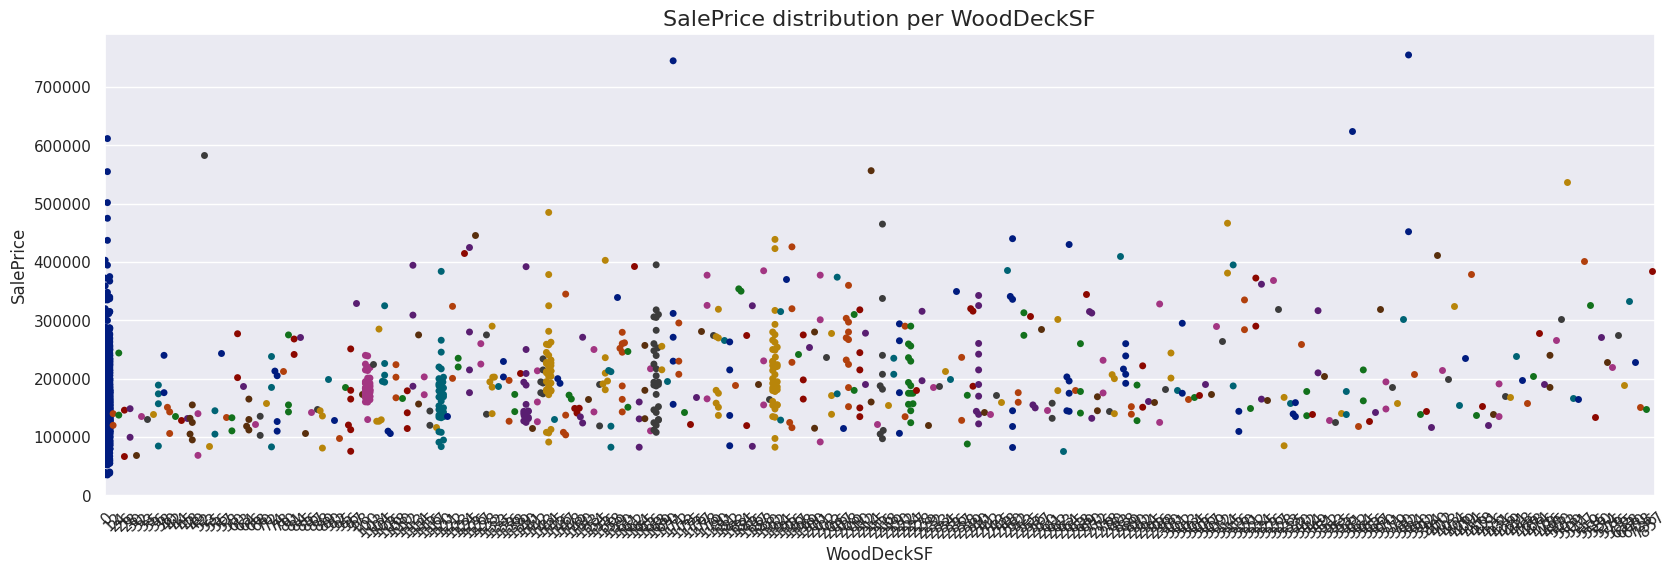

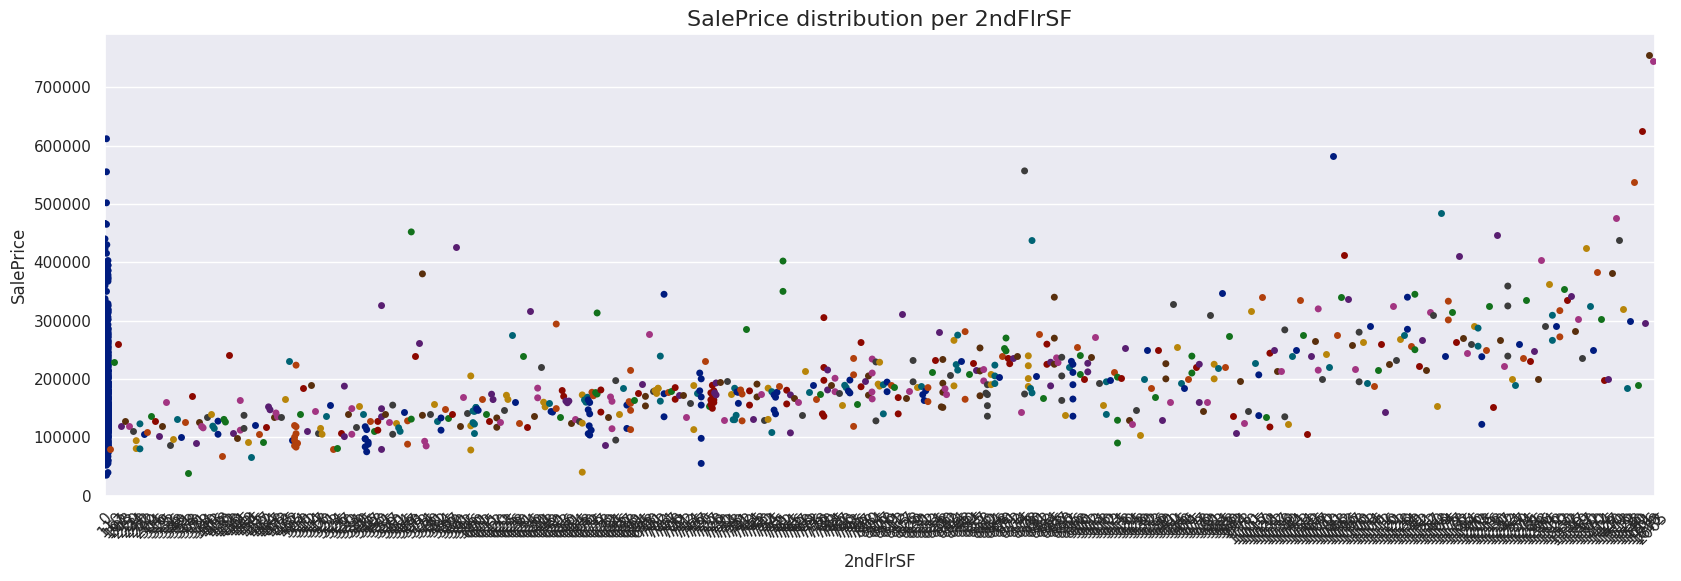

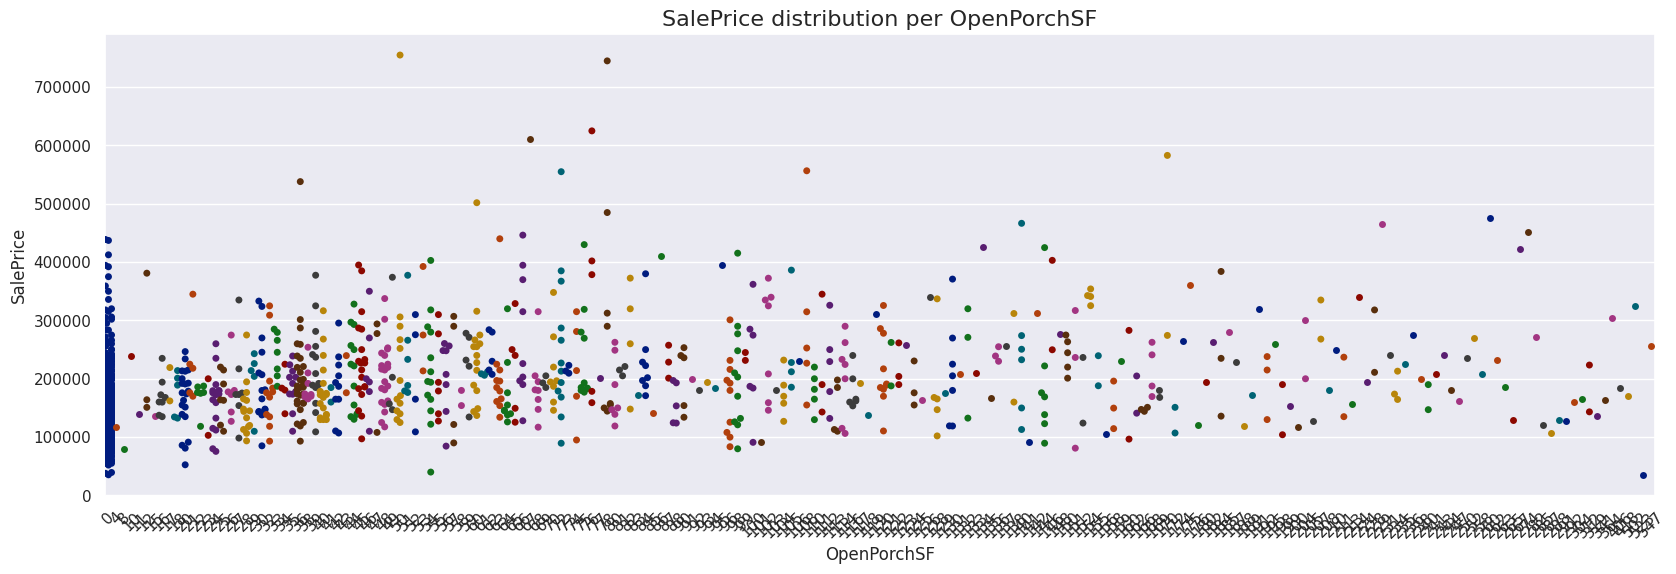

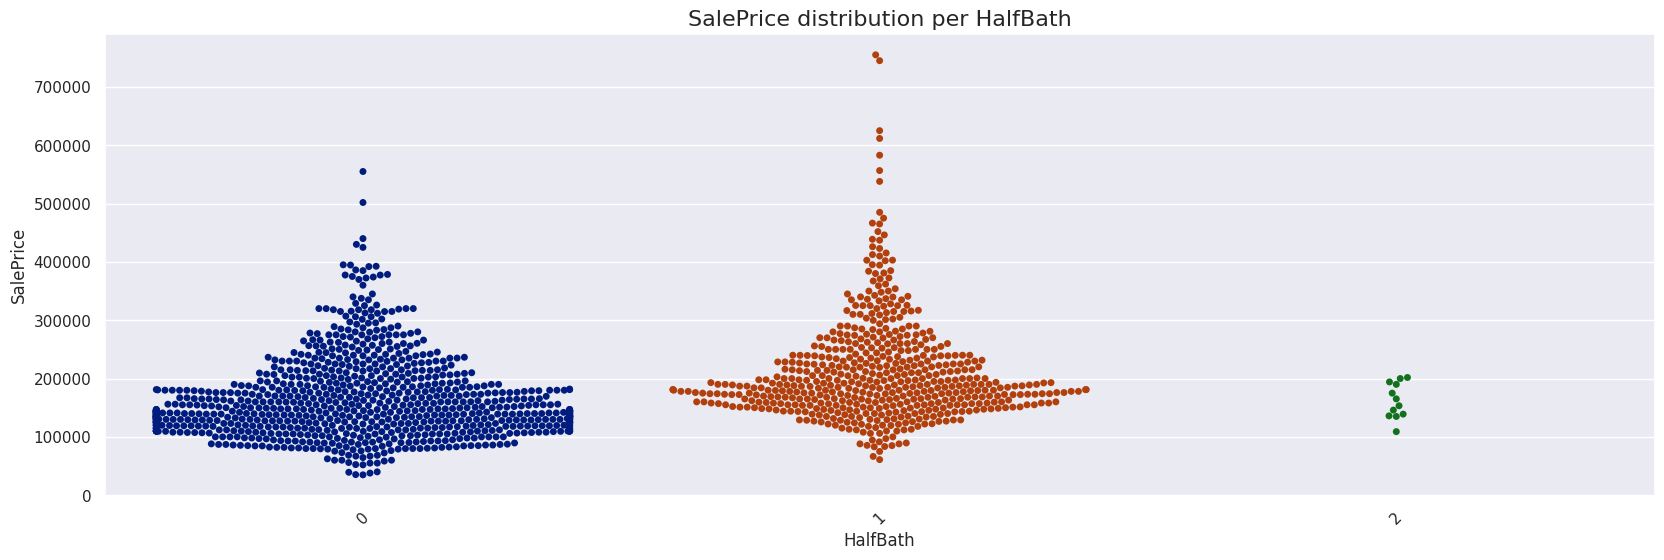

In [23]:
for feat in cols.values: #view the important feats
  plt.figure(figsize= (20,6))
  sns.swarmplot(y= "SalePrice", x=feat, palette= "dark", data= df)
  plt.title( "SalePrice distribution per {}".format( feat), fontdict= {"fontsize": 16})
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
for col in cols.values:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    sns.catplot(data=df, x=col, y="SalePrice", kind="box")
    plt.show

In [39]:
feats=[
'LotArea',
'MSZoning',
'Utilities',
'Neighborhood',
'HouseStyle',

'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'Heating',
'KitchenQual',
'GarageType',

'GarageQual']

In [40]:
for a in cols.values:
  feats.append(a)

In [42]:
im_feat= df_copy[feats]

In [43]:
im_feat.head(5)

LotArea MSZoning Utilities Neighborhood HouseStyle  YearBuilt YearRemodAdd  \
0     8450       RL    AllPub      CollgCr     2Story       2003         2003   
1     9600       RL    AllPub      Veenker     1Story       1976         1976   
2    11250       RL    AllPub      CollgCr     2Story       2001         2002   
3     9550       RL    AllPub      Crawfor     2Story       1915         1970   
4    14260       RL    AllPub      NoRidge     2Story       2000         2000   

  ExterQual ExterCond Heating  ... YearRemodAdd GarageYrBlt MasVnrArea  \
0        Gd        TA    GasA  ...         2003      2003.0      196.0   
1        TA        TA    GasA  ...         1976      1976.0        0.0   
2        Gd        TA    GasA  ...         2002      2001.0      162.0   
3        TA        TA    GasA  ...         1970      1998.0        0.0   
4        Gd        TA    GasA  ...         2000      2000.0      350.0   

   Fireplaces  BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  OpenPorchSF  \
0           0         706         65.0           0       854           61   
1           1         978         80.0         298         0            0   
2           1         486         68.0           0       866           42   
3           1         216         60.0           0       756           35   
4           1         655         84.0         192      1053           84   

   HalfBath  
0         1  
1         0  
2         1  
3         0  
4         1  

[5 rows x 33 columns]

In [48]:
print(im_feat.isna().sum())

LotArea           0
MSZoning          0
Utilities         0
Neighborhood      0
HouseStyle        0
YearBuilt         0
YearRemodAdd      0
ExterQual         0
ExterCond         0
Heating           0
KitchenQual       0
GarageType       81
GarageQual       81
SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
dtype: int64


In [ ]:
'''
clean this features:
LotFrontage: Linear feet of street connected to property
GarageYrBlt: Year garage was built
MasVnrArea: Masonry veneer area in square feet
 '''

In [68]:
#Cleaning the LotFrontage NaN values, 0 feets of street
im_feat['LotFrontage']= im_feat['LotFrontage'].fillna(0)
im_feat['GarageType']= im_feat['GarageType'].fillna(0)
im_feat['GarageQual']= im_feat['GarageQual'].fillna(0)
im_feat['MasVnrArea']= im_feat['MasVnrArea'].fillna(0)



In [66]:
X = im_feat['GarageYrBlt'].values.reshape(-1,1)
#X = X.toDataframe()
#X = pd.Dataframe(X)
imputer = KNNImputer(n_neighbors=1)
im_feat['GarageYrBlt']= imputer.fit_transform(X)

In [69]:
print(im_feat.isna().sum())

LotArea         0
MSZoning        0
Utilities       0
Neighborhood    0
HouseStyle      0
YearBuilt       0
YearRemodAdd    0
ExterQual       0
ExterCond       0
Heating         0
KitchenQual     0
GarageType      0
GarageQual      0
SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
dtype: int64


In [34]:
! mkdir datatrain

In [70]:
im_feat.to_csv(path_or_buf='/content/datatrain/data')